# Paleobathymetry

In this example we generate paleobathymetry NetCDF grids.

Paleobathymetry gridding in pyBacktrack takes a uniform grid of points on submerged crust and treats each point as if it was a drill site containing a single lithology (defaulting to Shale) with a present day compacted thickness (sampled from the builtin total sediment thickness grid). Grid points on continental crust use a rifting subsidence model where the rift start and end ages are obtained from builtin grids. Then all the grid points are reconstructed and backtracked to past times and combined into a history of paleobathymetry grids.


## Reference

The following paper covers the theory and algorithms of pyBacktrack:

* Müller, R. D., Cannon, J., Williams, S. and Dutkiewicz, A., 2018,
  PyBacktrack 1.0: A Tool for Reconstructing Paleobathymetry on Oceanic and Continental Crust,
  **Geochemistry, Geophysics, Geosystems,** 19, 1898-1909, doi: [10.1029/2017GC007313](https://doi.org/10.1029/2017GC007313)

## Generate paleobathymetry grids

Generate paleobathymetry NetCDF grids at 0.5 degree resolution from 0 to 60 Ma in 20 Myr increments using the M7 dynamic topography model and the GDH1 oceanic subsidence model. Also note that all CPUs otherwise it would be quite slow.

In [1]:
import pybacktrack

pybacktrack.reconstruct_paleo_bathymetry_grids(
    'data/paleo_bathymetry_M7_GDH1',
    grid_spacing_degrees=0.5,
    oldest_time=60,
    time_increment=20,
    dynamic_topography_model='M7',
    ocean_age_to_depth_model=pybacktrack.AGE_TO_DEPTH_MODEL_GDH1,
    use_all_cpus=True)

## Function to plot a paleobathymetry grid

Read in a paleobathymetry NetCDF grid generated above and display it. Bathymetry values are positive, and in units of metres.

In [2]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from netCDF4 import Dataset as netcdf
import numpy as np

def plot_paleo_bathymetry_grid(
        grid_file_basename,
        time):
    
    plt.figure(figsize=(12,6))

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title('Paleobathymetry {:.0f} Ma'.format(time), fontsize=16)

    # Read the paleobathymetry data.
    grid_file_name = '{}_{:.1f}.nc'.format(grid_file_basename, time)
    paleo_bathymetry_data = netcdf(grid_file_name, 'r')
    lons = paleo_bathymetry_data.variables['lon'][:]
    lats = paleo_bathymetry_data.variables['lat'][:]
    paleo_bathymetrys = -paleo_bathymetry_data.variables['z'][:]

    # Filled contours from paleobathymetry.
    vmin, vmax = 0, 6500
    paleo_bathymetry_filled_contours = ax.contourf(
                lons,
                lats,
                # Convert NaN to masked array. See https://stackoverflow.com/a/60031516 ...
                np.ma.array(paleo_bathymetrys, mask=np.isnan(paleo_bathymetrys)),
                # Specify levels between vmin/vmax. See https://stackoverflow.com/a/53641964 ...
                levels=np.linspace(vmin, vmax, 60+1),
                #origin='upper',
                cmap='YlGnBu',
                norm=colors.Normalize(vmin=vmin, vmax=vmax, clip=False),
                #vmin=vmin, vmax=vmax,
                #extend='min',
                transform=ccrs.PlateCarree())
    
    # Colour bar.
    plt.colorbar(paleo_bathymetry_filled_contours)

    plt.show()

## Plot each paleobathymetry grid

E:\Apps\miniconda3\envs\pybacktrack_py37\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
E:\Apps\miniconda3\envs\pybacktrack_py37\lib\site-packages\cartopy\crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
E:\Apps\miniconda3\envs\pybacktrack_py37\lib\site-packages\cartopy\crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
E:\Apps\miniconda3\envs

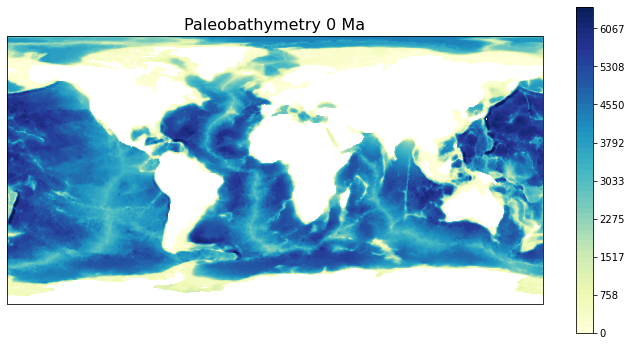

In [3]:
plot_paleo_bathymetry_grid('data/paleo_bathymetry_M7_GDH1', 0)

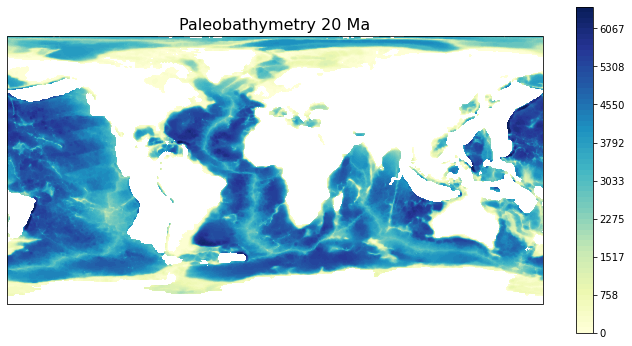

In [4]:
plot_paleo_bathymetry_grid('data/paleo_bathymetry_M7_GDH1', 20)

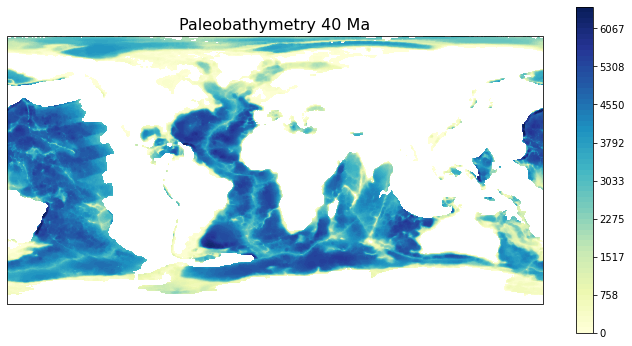

In [5]:
plot_paleo_bathymetry_grid('data/paleo_bathymetry_M7_GDH1', 40)

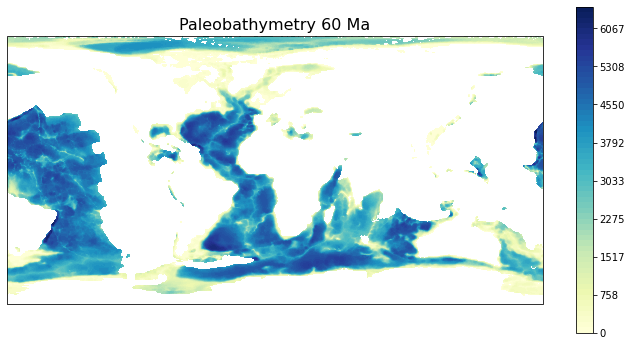

In [6]:
plot_paleo_bathymetry_grid('data/paleo_bathymetry_M7_GDH1', 60)